<a href="https://colab.research.google.com/github/LeonardoNBanegas/DATA-SCIENCE-CODERHOUSE/blob/main/ProyectoDS_ParteIII_Banegas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [386]:
from google.colab import files
uploaded = files.upload()  # abrir una ventana para seleccionar el archivo de mi pc


Saving CRO398-A-2.csv to CRO398-A-2 (4).csv


**Análisis de la Calidad de resepción de Servicio en una Red HFC a Nivel de Portadoras QAM* : Caso Telecom Argentina

Este proyecto se enfoca en el análisis detallado de un dataset que contiene información de 4868 portadoras de downstream y upstream pertenecientes a 139 cablemódems de una red HFC de Telecom Argentina. El objetivo principal es evaluar la calidad de servicio de DS y US (QoS) a nivel de portadora y, por extensión, deducir la calidad de experiencia de los usuarios finales.

El dataset, estructurado en un archivo CSV, incluye una amplia gama de métricas de la señal RF, como frecuencia, modulación, niveles de potencia, y ratios de error. A través de técnicas de análisis de datos, se busca identificar patrones, correlaciones y anomalías que permitan comprender los factores que influyen en la degradación de la señal y, consecuentemente, en la calidad de servicio.

**Preguntas de Investigación*:

¿Qué características de las portadoras (frecuencia, modulación, SNR, CER, CCER etc.) están más asociadas con una mayor degradación de la señal?
¿Existen diferencias significativas en la QoS entre portadoras de diferentes cablemódems (con 36, 10 o 2 portadoras)?
¿Cómo afecta la cantidad de portadoras asignadas a un cablemódem en la calidad de la señal y la experiencia del usuario?
¿Es posible construir modelos predictivos para identificar proactivamente portadoras con alto riesgo de degradación?

**Metodología:*

Se llevará a cabo un análisis exploratorio de los datos para identificar patrones y relaciones entre las variables

**Objetivos*:

**Evaluar la QoS*: Determinar el nivel de calidad de servicio ofrecido a los usuarios finales, considerando factores como la estabilidad de la señal, la corrección de paquetes y la tasa de errores en el espectro dedicado a la modulación QAM.
**Identificar factores críticos*: Identificar las variables que más influyen en la degradación de la señal y la calidad de servicio percibida por los usuarios.
**Desarrollar modelos predictivos*: Construir modelos que permitan predecir la ocurrencia de eventos que afecten la QoS, como fallas en el equipo o interferencias en la red.

**Hipótesis*

**Hipótesis 1*: Existe una correlación significativa entre las métricas de calidad de señal (SNR, MER, atenuación) y la calidad de servicio  de percibida por los usuarios.
**Hipótesis 2*: Los cablemódems con un menor número de portadoras asignadas presentan una mayor variabilidad en la calidad de señal y son más propensos a experimentar degradaciones.
**Hipótesis 3*: Las condiciones de la red (interferencias, ruido) tienen un impacto directo en la calidad de servicio, especialmente en las portadoras ubicadas en los extremos del espectro de frecuencias.

**Resultados esperados*:

Los resultados de este proyecto permitirán a Telecom Argentina identificar las áreas de la red que requieren mayor atención y optimizar los recursos para garantizar una experiencia de usuario de alta calidad. Además, los modelos desarrollados podrán ser utilizados como herramientas de soporte para la toma de decisiones en la gestión de la red, posibles acciones a tomar por parte de la gestión operativa de la compañia.
1-Generar un contacto con los abonados para acordar una visita técnica de forma proactiva.
2-Enviar una encuesta de satisfacción del servicio.
3-dentificar si la falla se relaciona con ingresos de ruido a la red.
4-identificar si es un cliente Promotor o Detractor
5-Promo/Descuento

**La tabla SC-QAM incluye las siguientes columnas:*

*-Row Number:* Número de fila de los canales ascendentes y descendentes.

*-Nombre del canal:* Canal asociado con la dirección MAC. Algunos canales tienen enlaces que dirigen a diferentes aplicaciones NXT.

*-Servicio parcial:* Muestra la razón por la que un CM está experimentando actualmente un servicio parcial con un grupo de enlaces que utiliza este canal. Un valor de "ninguno" indica que no hay servicio parcial.

*-Frecuencia (MHz):* Frecuencia central del canal portador de la señal, asociada con la dirección MAC.

*-Modulación:* El tipo de modulación configurado utilizado para transmitir datos. Los posibles valores ascendentes incluyen Quadrature Phase Shift Keying (QPSK) y Quadrature Amplitude Modulation (QAM 8, QAM 16, QAM 32, QAM 64 y QAM 128). Los valores descendentes QAM256.

*-CER (%):* Para los canales descendentes, CM CER es el porcentaje de todas las palabras de código recibidas por el CM que contienen un error no corregible. Para los canales ascendentes, CM CER es el porcentaje de todas las palabras de código transmitidas por el CM al CMTS que contienen errores no corregibles.

*-CCER (%):* Porcentaje de palabras de código recibidas en el CM que tienen errores corregibles.

*-CER+CCER (%):* Para los canales descendentes, el porcentaje de palabras de código recibidas en el CM que tienen errores no corregibles o corregibles. Para los canales ascendentes, el porcentaje de palabras de código recibidas por el CMTS de este CM que tienen errores no corregibles o corregibles.

*-MER (dB):* Relación de error de modulación, según lo informado por el receptor del módem por cable. Proporciona una medida de la calidad compuesta de la señal recibida, incluidas las distorsiones de SNR, fase y frecuencia. Se activa cuando el MER descendente cae por debajo del umbral configurado.

*-SNR (dB):* Para los canales ascendentes, SNR es la relación señal-ruido de las transmisiones de este CM, medida e informada por el CMTS. Para los canales descendentes, SNR es la relación señal-ruido de las transmisiones del CMTS medida en este CM.

*-TX Power (dBmV):* Para los canales ascendentes, la potencia RF compuesta total de un solo canal QAM establecida por el transmisor en la salida del módem por cable, según lo informado por el módem por cable.

*-Rx Power (dBmV):* Para los canales ascendentes, la potencia RF compuesta total de un solo canal QAM medida en la entrada del receptor del CMTS e informada por el CMTS. La recepción descendente es la potencia de la señal recibida e informada por el módem por cable. Si el nivel de potencia recibido es demasiado bajo o demasiado alto, la comunicación entre el módem por cable y el CMTS puede ser lenta o detenerse por completo.

*-Atenuación:* La pérdida de la fuerza de la señal ascendente a medida que viaja a través de la planta de cable, medida como la diferencia en dBmV entre la potencia de transmisión ascendente informada por un CM y la potencia de recepción ascendente para el módem, según lo informado por el CMTS.

*-Respuesta espectral (dB):* Una medida de las reflexiones no deseadas de la señal transmitida entre el módem por cable y el CMTS. Idealmente, la señal no debe reflejarse del receptor al transmisor. Si esto sucede, la señal reflejada puede interferir con la señal transmitida deseada y provocar errores en la señal, como los detectados por el receptor. Por lo tanto, el nivel de micro-reflexiones debe ser lo más bajo posible. La unidad dBc se refiere a la relación de potencia de una señal con respecto a la frecuencia portadora, donde la portadora es la frecuencia que transporta la señal transmitida deseada. En otras palabras, se basa en una relación de la potencia de las micro-reflexiones, dividida por la Potencia de la Señal Portadora. Los CMTS y CM informan esto como una medida de las micro-reflexiones por debajo de la portadora, por lo que es deseable un número positivo relativamente grande. Si este número es demasiado pequeño, indica que las micro-reflexiones no deseadas no están muy por debajo de la portadora en fuerza. Esta condición puede conducir a un rendimiento degradado para el usuario, ya que la señal puede estar recibiendo interferencia de las reflexiones.

*-Ecualización compuesta [NMTER] (dB):* Una medida de la cantidad total de ecualización que se aplica a la señal ascendente transmitida por el módem por cable, en relación con el nivel de grifo principal.

*-Respuesta de grupo [PREMTTER] (dB):* Una medida de la cantidad total de ecualización aplicada por la parte de retardo negativo del ecualizador a la señal ascendente transmitida por el módem por cable, en relación con el nivel de grifo principal.

*-Respuesta de eco [POSTMTTER] (dB):* Una medida de la cantidad total de ecualización aplicada por la parte de retardo positivo del ecualizador a la señal ascendente transmitida por el módem por cable, en relación con el nivel de grifo principal.


In [687]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


# Cargar el archivo CSV
df = pd.read_csv('CRO398-A-2.csv')

# Mostrar las primeras filas
print(df.head())

# Ver el tamaño del dataset
print(df.shape)


   Row Number        MAC Address  ...   Latest Proactive Scan      Latest Outage Scan
0           1  44:D4:54:B7:4D:34  ...  10/16/2024, 7:25:13 PM  10/16/2024, 7:25:13 PM
1           2  A0:39:EE:99:D9:30  ...  10/16/2024, 7:25:13 PM  10/16/2024, 7:25:13 PM
2           3  44:D4:54:A0:E1:47  ...  10/16/2024, 7:25:13 PM  10/16/2024, 7:25:13 PM
3           4  E4:C0:E2:13:05:4E  ...  10/16/2024, 7:25:13 PM  10/16/2024, 7:25:13 PM
4           5  E4:C0:E2:13:05:4E  ...  10/16/2024, 7:25:13 PM  10/16/2024, 7:25:13 PM

[5 rows x 22 columns]
(4868, 22)


In [688]:
# identificar valores nulos
df.info()
#sumar valores nulos
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4868 entries, 0 to 4867
Data columns (total 22 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Row Number                           4868 non-null   int64  
 1   MAC Address                          4868 non-null   object 
 2   Channel Name                         4868 non-null   object 
 3   Partial Service                      4868 non-null   object 
 4   Frequency (MHz)                      4868 non-null   float64
 5   Modulation                           4868 non-null   object 
 6   Status                               4868 non-null   object 
 7   Tx Power (dBmV)                      571 non-null    float64
 8   Rx Power (dBmV)                      4868 non-null   float64
 9   Attenuation (dB)                     571 non-null    float64
 10  MER (dB)                             4297 non-null   object 
 11  SNR (dB)                      

,0
Row Number,0
MAC Address,0
Channel Name,0
Partial Service,0
Frequency (MHz),0
Modulation,0
Status,0
Tx Power (dBmV),4297
Rx Power (dBmV),0
Attenuation (dB),4297


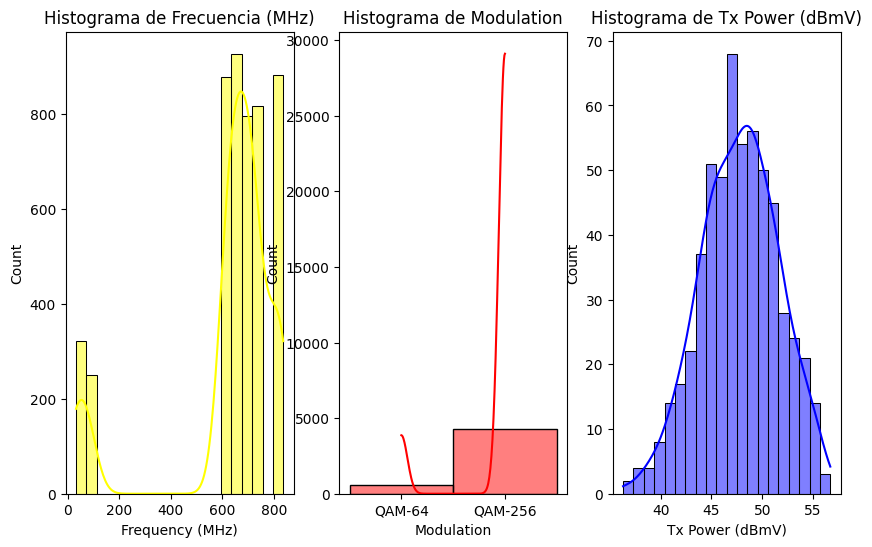

In [689]:
# histograma entre Frequency (MHz), Modulation y Tx Power, se utiliza para representar la distribución de un conjunto de datos
#Permiten ver la forma, la extensión y el centro de un conjunto de datos, y detectar patrones, tendencias y anomalías.
plt.figure(figsize=(10, 6))
plt.subplot(1,3,1)
sns.histplot(df['Frequency (MHz)'],bins=20, kde= True , color='yellow' )
plt.title('Histograma de Frecuencia (MHz)')
plt.subplot(1,3,2)
sns.histplot(df['Modulation'],bins=20, kde= True , color='red' )
plt.title('Histograma de Modulation')
plt.subplot(1,3,3)
sns.histplot(df['Tx Power (dBmV)'],bins=20, kde= True , color='blue' )
plt.title('Histograma de Tx Power (dBmV)')
plt.show()
#

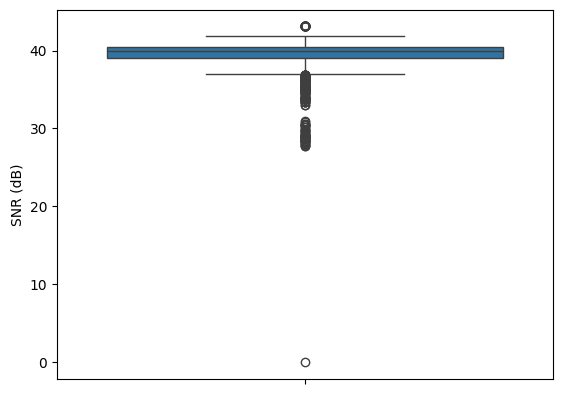

In [391]:
# identificar outliers de la columna SNR (dB)
sns.boxplot(y=df['SNR (dB)'])
plt.show()

In [690]:
# ver en pantalla si el dato es nulo o no
print(df.isnull())

      Row Number  MAC Address  ...  Latest Proactive Scan  Latest Outage Scan
0          False        False  ...                  False               False
1          False        False  ...                  False               False
2          False        False  ...                  False               False
3          False        False  ...                  False               False
4          False        False  ...                  False               False
...          ...          ...  ...                    ...                 ...
4863       False        False  ...                  False               False
4864       False        False  ...                  False               False
4865       False        False  ...                  False               False
4866       False        False  ...                  False               False
4867       False        False  ...                  False               False

[4868 rows x 22 columns]


In [691]:
# estadisticas de las columnas numéricas
df.describe()

,Row Number,Frequency (MHz),Tx Power (dBmV),Rx Power (dBmV),Attenuation (dB),SNR (dB),SNR Deviation (σ),CCER+CER (%),CER (%),Spectral Response (dB),Deviation of Echo Response (σ)
count,4868.000000,4868.000000,571.000000,4868.000000,571.000000,4868.000000,4868.000000,4868.000000,4868.000000,4297.000000,571.000000
mean,2434.500000,627.481758,47.792820,1.571549,40.803327,39.611011,0.223521,0.007549,0.000357,29.161973,0.000757
std,1405.414885,219.378809,3.817196,4.945049,3.962186,1.756538,0.238995,0.157276,0.006688,8.680112,0.003361
min,1.000000,32.200000,36.300000,-11.300000,29.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000041
25%,1217.750000,627.000000,45.000000,-2.500000,38.000000,39.100000,0.100000,0.000000,0.000000,29.000000,0.000123
50%,2434.500000,681.000000,47.800000,1.800000,40.800000,40.000000,0.100000,0.000000,0.000000,31.000000,0.000215
75%,3651.250000,735.000000,50.500000,5.800000,43.500000,40.500000,0.300000,0.000000,0.000000,34.000000,0.000367
max,4868.000000,837.000000,56.700000,14.500000,59.000000,43.100000,3.200000,6.184800,0.268600,45.000000,0.055377


In [692]:
#agrupar las Macs por modelo de Docsis de acuerdo a la cantidad de portadoras que utilizan
df['MAC Address'].value_counts()
value_counts = df['MAC Address'].value_counts()
value_counts

,count
MAC Address,
44:D4:54:B7:4D:34,36
6C:BA:B8:ED:A4:49,36
F4:C1:14:ED:23:04,36
6C:BA:B8:EF:F1:CA,36
5C:76:95:4A:DA:F4,36
...,...
4C:12:65:FC:51:C0,10
98:F7:81:4F:F5:18,10
4C:12:65:FC:02:A5,10


In [693]:
 # data frame solo de las variables continuas
 df_var_continuas = df.drop(['Row Number','Channel Name','MAC Address','Partial Service','Modulation','Status','Latest Proactive Scan','Latest Outage Scan','MER (dB)','Composite Equalization [NMTER] (dB)','Group Response [PREMTTER] (dB)','Echo Response [POSTMTTER] (dB)'], axis=1)
 df_var_continuas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4868 entries, 0 to 4867
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Frequency (MHz)                 4868 non-null   float64
 1   Tx Power (dBmV)                 571 non-null    float64
 2   Rx Power (dBmV)                 4868 non-null   float64
 3   Attenuation (dB)                571 non-null    float64
 4   SNR (dB)                        4868 non-null   float64
 5   SNR Deviation (σ)               4868 non-null   float64
 6   CCER+CER (%)                    4868 non-null   float64
 7   CER (%)                         4868 non-null   float64
 8   Spectral Response (dB)          4297 non-null   float64
 9   Deviation of Echo Response (σ)  571 non-null    float64
dtypes: float64(10)
memory usage: 380.4 KB


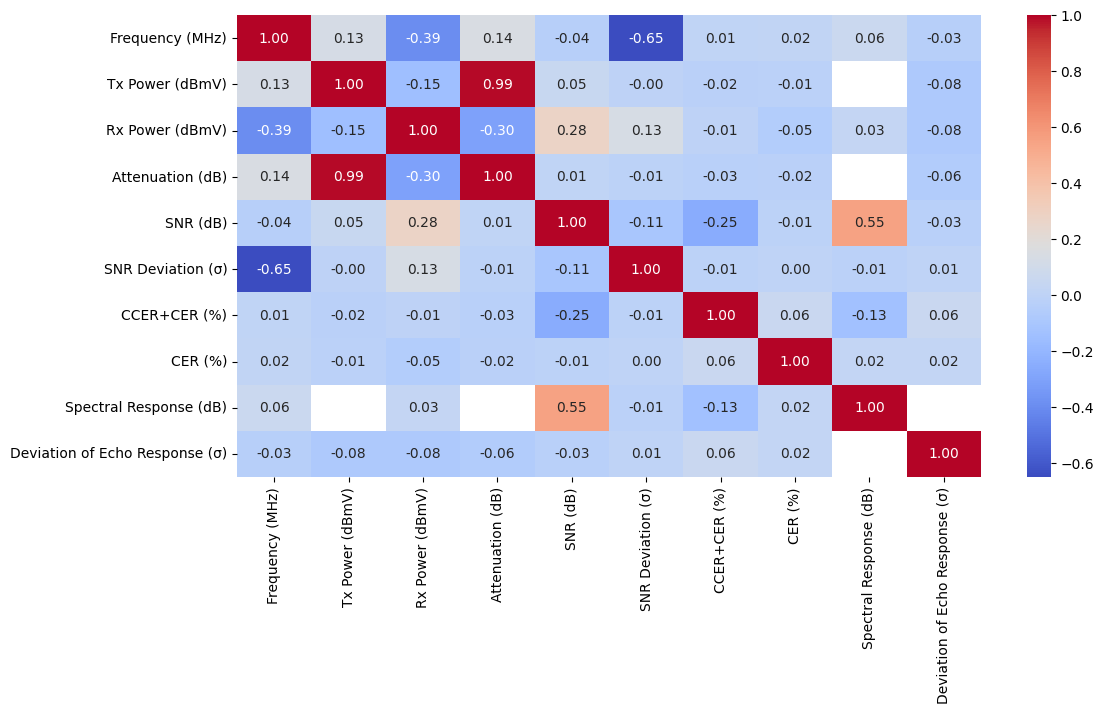

In [694]:
#matriz de correlacion de variables numéricas sirve para reducir la dimensionalidad
numeric_df = df.select_dtypes(include=np.number)#selecciona solo variables numéricas
plt.figure(figsize=(12,6))
sns.heatmap(df_var_continuas.corr(method='pearson'), annot=True, cmap='coolwarm',fmt='.2f')
plt.show()

In [695]:
#agrupar y modificar por modelo de Docsis
Docsis_31 = value_counts[value_counts == 36].index
Docsis_30 = value_counts[value_counts == 10].index
Docsis_20 = value_counts[value_counts == 2].index
docsis_model_mapping = {}
for mac in Docsis_31:
    docsis_model_mapping[mac] = 'Docsis 3.1'
for mac in Docsis_30:
    docsis_model_mapping[mac] = 'Docsis 3.0'
for mac in Docsis_20:
    docsis_model_mapping[mac] = 'Docsis 2.0'
print(docsis_model_mapping)

{'44:D4:54:B7:4D:34': 'Docsis 3.1', '6C:BA:B8:ED:A4:49': 'Docsis 3.1', 'F4:C1:14:ED:23:04': 'Docsis 3.1', '6C:BA:B8:EF:F1:CA': 'Docsis 3.1', '5C:76:95:4A:DA:F4': 'Docsis 3.1', '08:7E:64:92:42:AC': 'Docsis 3.1', '58:2F:F7:0B:38:8A': 'Docsis 3.1', '84:01:12:31:47:8D': 'Docsis 3.1', 'EC:BE:DD:AA:9B:00': 'Docsis 3.1', '08:7E:64:AA:63:AC': 'Docsis 3.1', 'D0:57:94:75:03:37': 'Docsis 3.1', '54:47:CC:4F:56:55': 'Docsis 3.1', '90:58:51:56:86:04': 'Docsis 3.1', 'B0:BB:E5:45:01:D8': 'Docsis 3.1', 'D0:57:94:6B:FC:68': 'Docsis 3.1', '08:7E:64:40:66:2C': 'Docsis 3.1', '98:9D:5D:4E:97:E4': 'Docsis 3.1', 'B8:66:85:EC:F0:05': 'Docsis 3.1', '48:4B:D4:42:5D:F4': 'Docsis 3.1', '48:4B:D4:41:E3:84': 'Docsis 3.1', '58:2F:F7:95:C2:D6': 'Docsis 3.1', '84:01:12:33:A3:E7': 'Docsis 3.1', 'D0:CF:0E:E4:A9:F9': 'Docsis 3.1', '98:77:E7:C9:71:24': 'Docsis 3.1', '6C:99:61:F0:1F:A3': 'Docsis 3.1', '50:6F:0C:D1:52:DF': 'Docsis 3.1', '38:3F:B3:E3:44:74': 'Docsis 3.1', '84:1E:A3:8F:39:46': 'Docsis 3.1', '30:24:78:67:D9:78'

In [398]:
# Contar las ocurrencias de cada versión de Docsis
from collections import Counter

docsis_counts = Counter(docsis_model_mapping.values())

# Imprimir los conteos
print(docsis_counts)

# Acceder a conteos individuales
print(f"Docsis 3.1: {docsis_counts['Docsis 3.1']}")
print(f"Docsis 3.0: {docsis_counts['Docsis 3.0']}")
print(f"Docsis 2.0: {docsis_counts['Docsis 2.0']}")

# Obtener el número total de dispositivos
total_devices = sum(docsis_counts.values())
print(f"Total de Dispositivos: {total_devices}")


Counter({'Docsis 3.1': 111, 'Docsis 3.0': 27, 'Docsis 2.0': 1})
Docsis 3.1: 111
Docsis 3.0: 27
Docsis 2.0: 1
Total de Dispositivos: 139


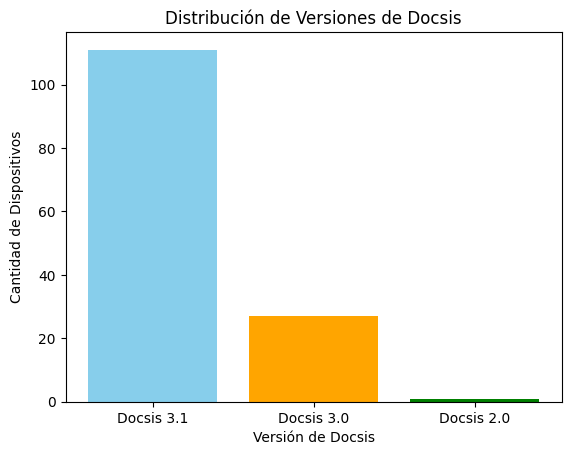

In [399]:
#grafico de barras de modelos Docsis
# Crear el gráfico de barras
colors = ['skyblue', 'orange', 'green']
plt.bar(docsis_counts.keys(), docsis_counts.values(),color=colors)

# Agregar etiquetas y título
plt.xlabel("Versión de Docsis")
plt.ylabel("Cantidad de Dispositivos")
plt.title("Distribución de Versiones de Docsis")

# Mostrar el gráfico
plt.show()

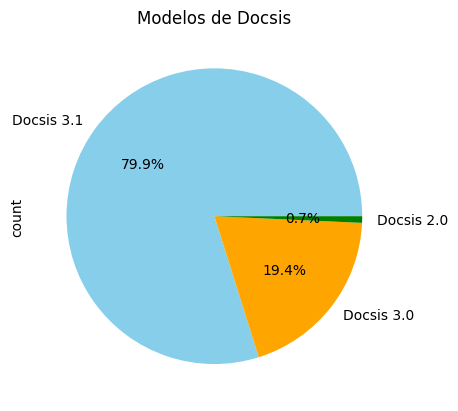

In [696]:
# % de modelos de Docsis en el parque desplegado.
# Convertir el diccionario a una serie de Pandas
docsis_model_series = pd.Series(docsis_model_mapping).value_counts()
# grafico de torta de modelos Docsis
colors = ['skyblue', 'orange', 'green']
docsis_model_series.plot(kind='pie', autopct='%1.1f%%', labels=docsis_model_series.index, colors=colors)
plt.title('Modelos de Docsis')
plt.show()

In [697]:
#reducir la dimensionalidad
# crear un nuevo dataframe solo de downstream borrando columnas de upstream
df_DS = df.drop(['Tx Power (dBmV)','Attenuation (dB)','Composite Equalization [NMTER] (dB)','Group Response [PREMTTER] (dB)','Echo Response [POSTMTTER] (dB)','Deviation of Echo Response (σ)'], axis=1)
df_DS.info()
#eliminar colomn Row Number
df_DS = df_DS.drop(['Row Number'], axis=1)
df_DS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4868 entries, 0 to 4867
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Row Number              4868 non-null   int64  
 1   MAC Address             4868 non-null   object 
 2   Channel Name            4868 non-null   object 
 3   Partial Service         4868 non-null   object 
 4   Frequency (MHz)         4868 non-null   float64
 5   Modulation              4868 non-null   object 
 6   Status                  4868 non-null   object 
 7   Rx Power (dBmV)         4868 non-null   float64
 8   MER (dB)                4297 non-null   object 
 9   SNR (dB)                4868 non-null   float64
 10  SNR Deviation (σ)       4868 non-null   float64
 11  CCER+CER (%)            4868 non-null   float64
 12  CER (%)                 4868 non-null   float64
 13  Spectral Response (dB)  4297 non-null   float64
 14  Latest Proactive Scan   4868 non-null   

In [698]:
# matriz de correlacion del df_DS solo valores numericos, sirve para reducir la dimensionalidad
correlation_matrix = df_DS.select_dtypes(include=np.number).corr()
show_correlation_matrix = correlation_matrix.style.background_gradient(cmap='coolwarm')
show_correlation_matrix

,Frequency (MHz),Rx Power (dBmV),SNR (dB),SNR Deviation (σ),CCER+CER (%),CER (%),Spectral Response (dB)
Frequency (MHz),1.000000,-0.392233,-0.035656,-0.649756,0.012408,0.019003,0.061963
Rx Power (dBmV),-0.392233,1.000000,0.275115,0.130626,-0.005034,-0.051797,0.027893
SNR (dB),-0.035656,0.275115,1.000000,-0.107568,-0.250333,-0.009169,0.549221
SNR Deviation (σ),-0.649756,0.130626,-0.107568,1.000000,-0.009919,0.002434,-0.013306
CCER+CER (%),0.012408,-0.005034,-0.250333,-0.009919,1.000000,0.058723,-0.134755
CER (%),0.019003,-0.051797,-0.009169,0.002434,0.058723,1.000000,0.022607
Spectral Response (dB),0.061963,0.027893,0.549221,-0.013306,-0.134755,0.022607,1.000000


<class 'pandas.core.frame.DataFrame'>
Index: 571 entries, 0 to 4867
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   MAC Address                          571 non-null    object 
 1   Channel Name                         571 non-null    object 
 2   Partial Service                      571 non-null    object 
 3   Frequency (MHz)                      571 non-null    float64
 4   Modulation                           571 non-null    object 
 5   Status                               571 non-null    object 
 6   Tx Power (dBmV)                      571 non-null    float64
 7   Rx Power (dBmV)                      571 non-null    float64
 8   Attenuation (dB)                     571 non-null    float64
 9   MER (dB)                             0 non-null      object 
 10  SNR (dB)                             571 non-null    float64
 11  SNR Deviation (σ)                   

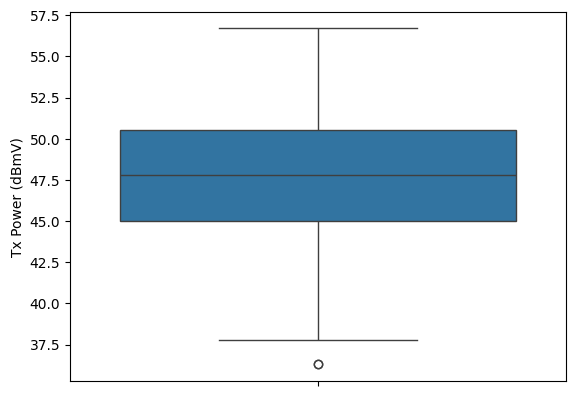

In [699]:
#reducir la dimensionalidad
# crear un nuevo df solo con las filas QAM-64(US) upstream
df_US = df.loc[df['Modulation'] == 'QAM-64']
df_US
#borrar la columna Row Number
df_US = df_US.drop(['Row Number'], axis=1)
df_US.info()
#borrar la columnas
df_US = df_US.drop(['Spectral Response (dB)','MER (dB)'], axis=1)
df_US.info()
#identificar outliers de la columna Tx Power
# TX < 40dBmV = baja/falla
# TX > 53dBmV = alta/falla
sns.boxplot(y=df_US['Tx Power (dBmV)'])
plt.show()

In [700]:
# matriz de correlacion del df_US sirve para reducir la dimensionalidad
correlation_matrix = df_US.select_dtypes(include=np.number).corr()
show_correlation_matrix = correlation_matrix.style.background_gradient(cmap='coolwarm')
show_correlation_matrix

,Frequency (MHz),Tx Power (dBmV),Rx Power (dBmV),Attenuation (dB),SNR (dB),SNR Deviation (σ),CCER+CER (%),CER (%),Deviation of Echo Response (σ)
Frequency (MHz),1.000000,0.128967,-0.124803,0.144384,0.170543,0.184947,-0.155616,-0.043117,-0.034554
Tx Power (dBmV),0.128967,1.000000,-0.147380,0.987185,0.049620,-0.001031,-0.022988,-0.013746,-0.078048
Rx Power (dBmV),-0.124803,-0.147380,1.000000,-0.303329,0.216707,0.046677,0.017826,0.034695,-0.080475
Attenuation (dB),0.144384,0.987185,-0.303329,1.000000,0.012840,-0.008524,-0.025023,-0.018841,-0.062208
SNR (dB),0.170543,0.049620,0.216707,0.012840,1.000000,0.155161,-0.010596,-0.001055,-0.027703
SNR Deviation (σ),0.184947,-0.001031,0.046677,-0.008524,0.155161,1.000000,-0.052497,-0.015651,0.006017
CCER+CER (%),-0.155616,-0.022988,0.017826,-0.025023,-0.010596,-0.052497,1.000000,0.090816,0.055819
CER (%),-0.043117,-0.013746,0.034695,-0.018841,-0.001055,-0.015651,0.090816,1.000000,0.022952
Deviation of Echo Response (σ),-0.034554,-0.078048,-0.080475,-0.062208,-0.027703,0.006017,0.055819,0.022952,1.000000


In [405]:
#reducir la dimensionalidad
# eliminar la columna Attenuation de df_US por tener alta correlación con Tx Power
df_US = df_US.drop(['Attenuation (dB)'], axis=1)
df_US.info()

<class 'pandas.core.frame.DataFrame'>
Index: 571 entries, 0 to 4867
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   MAC Address                          571 non-null    object 
 1   Channel Name                         571 non-null    object 
 2   Partial Service                      571 non-null    object 
 3   Frequency (MHz)                      571 non-null    float64
 4   Modulation                           571 non-null    object 
 5   Status                               571 non-null    object 
 6   Tx Power (dBmV)                      571 non-null    float64
 7   Rx Power (dBmV)                      571 non-null    float64
 8   SNR (dB)                             571 non-null    float64
 9   SNR Deviation (σ)                    571 non-null    float64
 10  CCER+CER (%)                         571 non-null    float64
 11  CER (%)                             

In [701]:
# identificar dato Tx Power < a 37
df_US.loc[df_US['Tx Power (dBmV)'] < 37]

,MAC Address,Channel Name,Partial Service,Frequency (MHz),Modulation,Status,Tx Power (dBmV),Rx Power (dBmV),Attenuation (dB),SNR (dB),SNR Deviation (σ),CCER+CER (%),CER (%),Composite Equalization [NMTER] (dB),Group Response [PREMTTER] (dB),Echo Response [POSTMTTER] (dB),Deviation of Echo Response (σ),Latest Proactive Scan,Latest Outage Scan
2644,D0:6E:DE:8E:DD:E9,Cable1/0/3-upstream1,none,32.2,QAM-64,Online,36.3,7.0,29.3,40.0,0.6,0.0106,0.0,-24.9,-40.1,-25,0.000178,"10/16/2024, 7:25:13 PM","10/16/2024, 7:25:13 PM"
3765,D0:6E:DE:8E:DD:E9,Cable1/0/3-upstream0,none,38.6,QAM-64,Online,36.3,7.0,29.3,39.1,0.5,0.0023,0.0,-25.9,-36.4,-26.3,0.000306,"10/16/2024, 7:25:13 PM","10/16/2024, 7:25:13 PM"


In [527]:
#imputarle la moda a las filas con Tx Power < a 37
df_US.loc[df_US['Tx Power (dBmV)'] < 37, 'Tx Power (dBmV)'] = df_US['Tx Power (dBmV)'].mode()[0]
df_US.info()

<class 'pandas.core.frame.DataFrame'>
Index: 571 entries, 0 to 4867
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Partial Service                 571 non-null    object 
 1   Frequency (MHz)                 571 non-null    float64
 2   Tx Power (dBmV)                 571 non-null    float64
 3   SNR (dB)                        571 non-null    float64
 4   SNR Deviation (σ)               571 non-null    float64
 5   CCER+CER (%)                    571 non-null    float64
 6   CER (%)                         571 non-null    float64
 7   Deviation of Echo Response (σ)  571 non-null    float64
dtypes: float64(7), object(1)
memory usage: 56.3+ KB


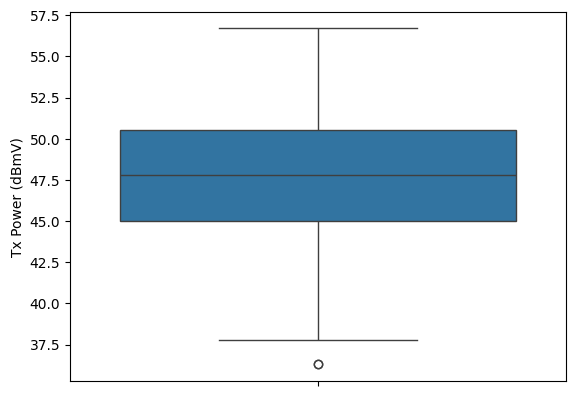

In [702]:
#identificar outliers de la columna Tx Power
# TX < 40dBmV = baja/falla
# TX > 53dBmV = alta/falla
sns.boxplot(y=df_US['Tx Power (dBmV)'])
plt.show()

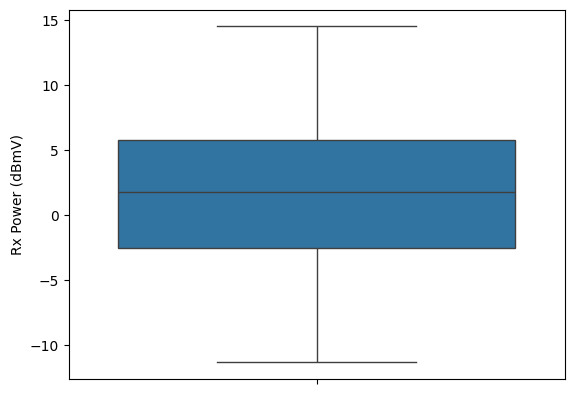

In [409]:
# identificar outliers de la columna Rx Power (dB)
# Rx < -10dBmV = baja/falla
# Rx > 10dBmV = alta/falla
sns.boxplot(y=df_DS['Rx Power (dBmV)'])
plt.show()

In [703]:
# Imputar la media a los datos nulos de la columna MER (db)
# Convertir la columna 'MER (dB)' a numérica, manejando errores
df_DS['MER (dB)'] = pd.to_numeric(df_DS['MER (dB)'], errors='coerce')
df_DS['MER (dB)'].fillna(df_DS['MER (dB)'].mean(), inplace=True)
df_DS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4868 entries, 0 to 4867
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   MAC Address             4868 non-null   object 
 1   Channel Name            4868 non-null   object 
 2   Partial Service         4868 non-null   object 
 3   Frequency (MHz)         4868 non-null   float64
 4   Modulation              4868 non-null   object 
 5   Status                  4868 non-null   object 
 6   Rx Power (dBmV)         4868 non-null   float64
 7   MER (dB)                4868 non-null   float64
 8   SNR (dB)                4868 non-null   float64
 9   SNR Deviation (σ)       4868 non-null   float64
 10  CCER+CER (%)            4868 non-null   float64
 11  CER (%)                 4868 non-null   float64
 12  Spectral Response (dB)  4297 non-null   float64
 13  Latest Proactive Scan   4868 non-null   object 
 14  Latest Outage Scan      4868 non-null   

<ipython-input-703-1410de9a315c>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_DS['MER (dB)'].fillna(df_DS['MER (dB)'].mean(), inplace=True)


In [704]:
# Imputar la media a los datos nulos de la columna Spectral Response (dB)
# Convertir la columna 'Spectral Response (dB)' a numérica, manejando errores
df_DS['Spectral Response (dB)'] = pd.to_numeric(df_DS['Spectral Response (dB)'], errors='coerce')
df_DS['Spectral Response (dB)'].fillna(df_DS['Spectral Response (dB)'].mean(), inplace=True)
df_DS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4868 entries, 0 to 4867
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   MAC Address             4868 non-null   object 
 1   Channel Name            4868 non-null   object 
 2   Partial Service         4868 non-null   object 
 3   Frequency (MHz)         4868 non-null   float64
 4   Modulation              4868 non-null   object 
 5   Status                  4868 non-null   object 
 6   Rx Power (dBmV)         4868 non-null   float64
 7   MER (dB)                4868 non-null   float64
 8   SNR (dB)                4868 non-null   float64
 9   SNR Deviation (σ)       4868 non-null   float64
 10  CCER+CER (%)            4868 non-null   float64
 11  CER (%)                 4868 non-null   float64
 12  Spectral Response (dB)  4868 non-null   float64
 13  Latest Proactive Scan   4868 non-null   object 
 14  Latest Outage Scan      4868 non-null   

<ipython-input-704-607561de6a00>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_DS['Spectral Response (dB)'].fillna(df_DS['Spectral Response (dB)'].mean(), inplace=True)


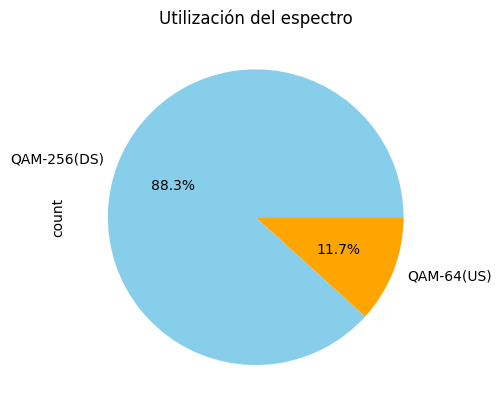

In [528]:
# grafico de torta de la columna Modulation
colors = ['skyblue', 'orange', 'green']
df['Modulation'].value_counts().plot(kind='pie', autopct='%1.1f%%', labels=['QAM-256(DS)', 'QAM-64(US)'],colors=colors)
plt.title('Utilización del espectro')
plt.show()
# en este gráfico se aprecia que un 88.3% del espectro se usa para la descarga


In [413]:
# Mostrar los nombres de todas las columnas en el DataFrame DS
print(df_DS.columns)

Index(['MAC Address', 'Channel Name', 'Partial Service', 'Frequency (MHz)',
       'Modulation', 'Status', 'Rx Power (dBmV)', 'MER (dB)', 'SNR (dB)',
       'SNR Deviation (σ)', 'CCER+CER (%)', 'CER (%)',
       'Spectral Response (dB)', 'Latest Proactive Scan',
       'Latest Outage Scan'],
      dtype='object')


In [414]:
# Mostrar los nombres de todas las columnas en el DataFrame US
print(df_US.columns)

Index(['MAC Address', 'Channel Name', 'Partial Service', 'Frequency (MHz)',
       'Modulation', 'Status', 'Tx Power (dBmV)', 'Rx Power (dBmV)',
       'SNR (dB)', 'SNR Deviation (σ)', 'CCER+CER (%)', 'CER (%)',
       'Composite Equalization [NMTER] (dB)', 'Group Response [PREMTTER] (dB)',
       'Echo Response [POSTMTTER] (dB)', 'Deviation of Echo Response (σ)',
       'Latest Proactive Scan', 'Latest Outage Scan'],
      dtype='object')


In [705]:
#reducir la dimensionalidad
#eliminar columna 'Rx Power (dBmV)' de df_US
df_US = df_US.drop(['Rx Power (dBmV)'], axis=1)
df_US.info()

<class 'pandas.core.frame.DataFrame'>
Index: 571 entries, 0 to 4867
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   MAC Address                          571 non-null    object 
 1   Channel Name                         571 non-null    object 
 2   Partial Service                      571 non-null    object 
 3   Frequency (MHz)                      571 non-null    float64
 4   Modulation                           571 non-null    object 
 5   Status                               571 non-null    object 
 6   Tx Power (dBmV)                      571 non-null    float64
 7   Attenuation (dB)                     571 non-null    float64
 8   SNR (dB)                             571 non-null    float64
 9   SNR Deviation (σ)                    571 non-null    float64
 10  CCER+CER (%)                         571 non-null    float64
 11  CER (%)                             

In [416]:
#seleccionar cpes con SNR menor a 32dBmV en US (Relación Señal Ruido bajo en portadoras upstream)
df.loc[(df["SNR (dB)"] < 32) & (df['Modulation'] == 'QAM-64')]

,Row Number,MAC Address,Channel Name,Partial Service,Frequency (MHz),Modulation,Status,Tx Power (dBmV),Rx Power (dBmV),Attenuation (dB),MER (dB),SNR (dB),SNR Deviation (σ),CCER+CER (%),CER (%),Spectral Response (dB),Composite Equalization [NMTER] (dB),Group Response [PREMTTER] (dB),Echo Response [POSTMTTER] (dB),Deviation of Echo Response (σ),Latest Proactive Scan,Latest Outage Scan
4818,4819,84:17:EF:31:46:28,Cable1/0/3-upstream5,other(1),81.8,QAM-64,Online,54.0,-5.0,59.0,NaN,30.9,0.3,0.0,0.0,NaN,-10.8,-24.5,-11,0.010756,"10/16/2024, 7:25:13 PM","10/16/2024, 7:25:13 PM"
4867,4868,48:29:52:33:5B:5B,Cable1/0/3-upstream1,other(1),32.2,QAM-64,Online,40.3,7.0,33.3,NaN,0.0,0.0,0.0,0.0,NaN,--,--,--,0.000188,"10/16/2024, 7:25:13 PM","10/16/2024, 7:25:13 PM"


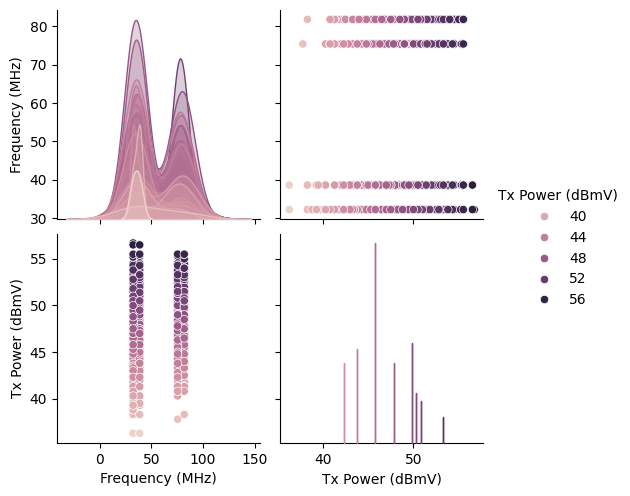

In [706]:
#matriz de disperción de df_US
#relación entre variables potencia, frecuencia y atenuación en US

sns.pairplot(df_US, vars=['Frequency (MHz)','Tx Power (dBmV)'], hue='Tx Power (dBmV)')
plt.show()

In [707]:
#seleccionar cpes con CER (perdida de paquetes en DS) distinto de cero en DS
df.loc[(df["CER (%)"] > 0.1 ) & (df['Modulation'] == 'QAM-256')]

,Row Number,MAC Address,Channel Name,Partial Service,Frequency (MHz),Modulation,Status,Tx Power (dBmV),Rx Power (dBmV),Attenuation (dB),MER (dB),SNR (dB),SNR Deviation (σ),CCER+CER (%),CER (%),Spectral Response (dB),Composite Equalization [NMTER] (dB),Group Response [PREMTTER] (dB),Echo Response [POSTMTTER] (dB),Deviation of Echo Response (σ),Latest Proactive Scan,Latest Outage Scan
2002,2003,98:52:4A:42:7D:24,Integrated-Cable1/0/0-downstream20,none,723.0,QAM-256,Online,NaN,-3.7,NaN,40.1,40.2,0.1,0.1648,0.1116,34.0,NaN,NaN,NaN,NaN,"10/16/2024, 7:25:13 PM","10/16/2024, 7:25:13 PM"
3487,3488,08:7E:64:3C:32:F4,Integrated-Cable1/0/3-downstream30,none,831.0,QAM-256,Online,NaN,-1.3,NaN,39.3,39.3,0.4,0.1544,0.1216,35.0,NaN,NaN,NaN,NaN,"10/16/2024, 7:25:13 PM","10/16/2024, 7:25:13 PM"
4134,4135,98:52:4A:42:7D:24,Integrated-Cable1/0/0-downstream29,none,825.0,QAM-256,Online,NaN,-5.9,NaN,38.6,38.6,0.2,0.3762,0.2686,33.0,NaN,NaN,NaN,NaN,"10/16/2024, 7:25:13 PM","10/16/2024, 7:25:13 PM"
4223,4224,98:52:4A:42:7D:24,Integrated-Cable1/0/0-downstream30,none,831.0,QAM-256,Online,NaN,-5.9,NaN,38.5,38.5,0.2,0.3433,0.2483,33.0,NaN,NaN,NaN,NaN,"10/16/2024, 7:25:13 PM","10/16/2024, 7:25:13 PM"


In [708]:
#seleccionar cpes en Partial Service en US
#AQUI VEMOS 2 CMs DE CLIENTES CON FALLAS EN UPSTREAM, A LOS CUALES SE LES PODRIA ENVIAR UN TECNICO ANTES DE QUE GENEREN UN RECLAMO O SEAN CLIENTES DETRACTORES
df.loc[(df['Partial Service'] != 'none') & (df['Modulation'] == 'QAM-64')]

,Row Number,MAC Address,Channel Name,Partial Service,Frequency (MHz),Modulation,Status,Tx Power (dBmV),Rx Power (dBmV),Attenuation (dB),MER (dB),SNR (dB),SNR Deviation (σ),CCER+CER (%),CER (%),Spectral Response (dB),Composite Equalization [NMTER] (dB),Group Response [PREMTTER] (dB),Echo Response [POSTMTTER] (dB),Deviation of Echo Response (σ),Latest Proactive Scan,Latest Outage Scan
4818,4819,84:17:EF:31:46:28,Cable1/0/3-upstream5,other(1),81.8,QAM-64,Online,54.0,-5.0,59.0,NaN,30.9,0.3,0.0,0.0,NaN,-10.8,-24.5,-11,0.010756,"10/16/2024, 7:25:13 PM","10/16/2024, 7:25:13 PM"
4867,4868,48:29:52:33:5B:5B,Cable1/0/3-upstream1,other(1),32.2,QAM-64,Online,40.3,7.0,33.3,NaN,0.0,0.0,0.0,0.0,NaN,--,--,--,0.000188,"10/16/2024, 7:25:13 PM","10/16/2024, 7:25:13 PM"


In [709]:
# ver solo los cpes offline
#LOS CPES PUEDEN ESTAR OFF LINE POR DIFERENTES MOTIVOS RELACIONADOS O NO LA RED, CON ESTOS DATOS SE PUEDE HACER UN ANALISIS MAS PROFUNDO UE INCLUYA DATOS GEOREFERENCIADOS DONDE SE PODRIA INTENTAR PRECISAR SI ES UNA FALLA MASIVA O NO, Y DISPARAR UNA ALARMA DE OUTAGE
df.loc[df['Status'] == 'Offline']

,Row Number,MAC Address,Channel Name,Partial Service,Frequency (MHz),Modulation,Status,Tx Power (dBmV),Rx Power (dBmV),Attenuation (dB),MER (dB),SNR (dB),SNR Deviation (σ),CCER+CER (%),CER (%),Spectral Response (dB),Composite Equalization [NMTER] (dB),Group Response [PREMTTER] (dB),Echo Response [POSTMTTER] (dB),Deviation of Echo Response (σ),Latest Proactive Scan,Latest Outage Scan
2549,2550,18:B8:1F:F9:54:FE,Cable1/0/3-upstream0,none,38.6,QAM-64,Offline,47.5,7.0,40.5,NaN,40.0,0.5,0.0000,0.0,NaN,-27.6,-30.2,-30.9,0.000158,"10/16/2024, 1:33:15 AM","10/16/2024, 7:25:13 PM"
2789,2790,18:B8:1F:F9:54:FE,Integrated-Cable1/0/3-downstream6,none,639.0,QAM-256,Offline,NaN,5.1,NaN,39.8,39.9,0.1,0.0000,0.0,36.0,NaN,NaN,NaN,NaN,"10/16/2024, 1:33:15 AM","10/16/2024, 7:25:13 PM"
2790,2791,18:B8:1F:F9:54:FE,Integrated-Cable1/0/3-downstream7,none,645.0,QAM-256,Offline,NaN,5.3,NaN,39.9,39.9,0.0,0.0000,0.0,36.0,NaN,NaN,NaN,NaN,"10/16/2024, 1:33:15 AM","10/16/2024, 7:25:13 PM"
2949,2950,18:B8:1F:F9:54:FE,Integrated-Cable1/0/3-downstream5,none,633.0,QAM-256,Offline,NaN,4.7,NaN,39.7,39.8,0.0,0.0000,0.0,36.0,NaN,NaN,NaN,NaN,"10/16/2024, 1:33:15 AM","10/16/2024, 7:25:13 PM"
3211,3212,18:B8:1F:F9:54:FE,Integrated-Cable1/0/3-downstream0,none,603.0,QAM-256,Offline,NaN,4.4,NaN,39.5,39.6,0.1,0.0000,0.0,30.0,NaN,NaN,NaN,NaN,"10/16/2024, 1:33:15 AM","10/16/2024, 7:25:13 PM"
3212,3213,18:B8:1F:F9:54:FE,Integrated-Cable1/0/3-downstream4,none,627.0,QAM-256,Offline,NaN,4.3,NaN,39.6,39.6,0.0,0.0000,0.0,36.0,NaN,NaN,NaN,NaN,"10/16/2024, 1:33:15 AM","10/16/2024, 7:25:13 PM"
3334,3335,18:B8:1F:F9:54:FE,Integrated-Cable1/0/3-downstream1,none,609.0,QAM-256,Offline,NaN,4.2,NaN,39.4,39.5,0.1,0.0000,0.0,35.0,NaN,NaN,NaN,NaN,"10/16/2024, 1:33:15 AM","10/16/2024, 7:25:13 PM"
3335,3336,18:B8:1F:F9:54:FE,Integrated-Cable1/0/3-downstream2,none,615.0,QAM-256,Offline,NaN,4.1,NaN,39.4,39.5,0.1,0.0000,0.0,33.0,NaN,NaN,NaN,NaN,"10/16/2024, 1:33:15 AM","10/16/2024, 7:25:13 PM"
3336,3337,18:B8:1F:F9:54:FE,Integrated-Cable1/0/3-downstream3,none,621.0,QAM-256,Offline,NaN,4.0,NaN,39.5,39.5,0.1,0.0000,0.0,38.0,NaN,NaN,NaN,NaN,"10/16/2024, 1:33:15 AM","10/16/2024, 7:25:13 PM"
4525,4526,18:B8:1F:F9:54:FE,Cable1/0/3-upstream1,none,32.2,QAM-64,Offline,47.5,7.0,40.5,NaN,37.6,1.4,0.0022,0.0,NaN,-26,-31.2,-27.5,0.000364,"10/16/2024, 1:33:15 AM","10/16/2024, 7:25:13 PM"


In [710]:
# seleccionar cpes con potencia de retorno alta (TX > a 53dBmV)
tx_alta = df.loc[(df['Tx Power (dBmV)'] > 53) & (df['Modulation'] == 'QAM-64')]
print(tx_alta.head())

      Row Number        MAC Address  ...   Latest Proactive Scan      Latest Outage Scan
5              6  44:05:3F:63:57:A0  ...  10/16/2024, 7:25:13 PM  10/16/2024, 7:25:13 PM
31            32  4C:12:65:FB:EF:CD  ...  10/16/2024, 7:25:13 PM  10/16/2024, 7:25:13 PM
33            34  A0:FF:70:86:0B:D4  ...  10/16/2024, 7:25:13 PM  10/16/2024, 7:25:13 PM
2246        2247  44:05:3F:63:57:A0  ...  10/16/2024, 7:25:13 PM  10/16/2024, 7:25:13 PM
2282        2283  54:47:CC:50:31:2A  ...  10/16/2024, 7:25:13 PM  10/16/2024, 7:25:13 PM

[5 rows x 22 columns]


In [711]:
#seleccionar cpes con potencia de recepción baja ( RX < -10 dBmV)
rx_baja = df.loc[(df['Rx Power (dBmV)'] < -10) & (df['Modulation'] == 'QAM-256')]
# Mostrar las primeras filas
print(rx_baja.head())

      Row Number        MAC Address  ...   Latest Proactive Scan      Latest Outage Scan
3976        3977  C0:3C:04:EF:F2:5E  ...  10/16/2024, 7:25:13 PM  10/16/2024, 7:25:13 PM
3977        3978  C0:3C:04:EF:F2:5E  ...  10/16/2024, 7:25:13 PM  10/16/2024, 7:25:13 PM
3978        3979  C0:3C:04:EF:F2:5E  ...  10/16/2024, 7:25:13 PM  10/16/2024, 7:25:13 PM
3979        3980  C0:3C:04:EF:F2:5E  ...  10/16/2024, 7:25:13 PM  10/16/2024, 7:25:13 PM
4039        4040  C0:3C:04:EF:F2:5E  ...  10/16/2024, 7:25:13 PM  10/16/2024, 7:25:13 PM

[5 rows x 22 columns]


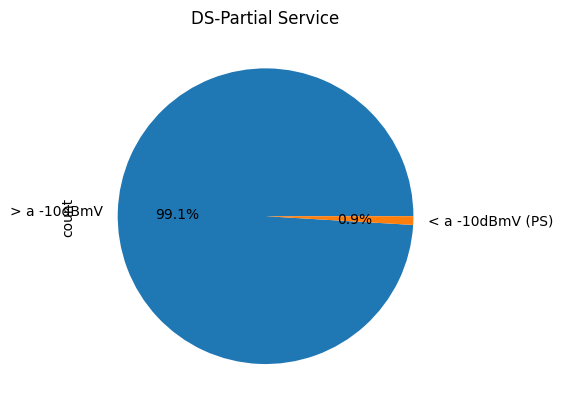

In [712]:
#grafico de torta cantidad de CMs menores y mayores a -10dBmV.
# Crear una serie booleana que indique si el valor es mayor o menor a -10
rx_power = df['Rx Power (dBmV)']
mayor_a_menos_10 = rx_power > -10

# Contar los valores mayores y menores a -10
conteo = mayor_a_menos_10.value_counts()

# Graficar la torta
conteo.plot(kind='pie', autopct='%1.1f%%', labels=['> a -10dBmV', '< a -10dBmV (PS)'])
plt.title('DS-Partial Service')
plt.show()


In [713]:
# mostrar solo canales de US
df.loc[(df['Modulation'] == 'QAM-64')]

,Row Number,MAC Address,Channel Name,Partial Service,Frequency (MHz),Modulation,Status,Tx Power (dBmV),Rx Power (dBmV),Attenuation (dB),MER (dB),SNR (dB),SNR Deviation (σ),CCER+CER (%),CER (%),Spectral Response (dB),Composite Equalization [NMTER] (dB),Group Response [PREMTTER] (dB),Echo Response [POSTMTTER] (dB),Deviation of Echo Response (σ),Latest Proactive Scan,Latest Outage Scan
0,1,44:D4:54:B7:4D:34,Cable1/0/3-upstream4,none,75.4,QAM-64,Online,48.5,7.0,41.5,NaN,43.1,0.9,0.0000,0.0000,NaN,-26.4,-27.7,-32.2,0.000065,"10/16/2024, 7:25:13 PM","10/16/2024, 7:25:13 PM"
1,2,A0:39:EE:99:D9:30,Cable1/0/3-upstream0,none,38.6,QAM-64,Online,44.5,8.0,36.5,NaN,43.1,1.7,0.0114,0.0006,NaN,-28.7,-29.9,-34.6,0.000099,"10/16/2024, 7:25:13 PM","10/16/2024, 7:25:13 PM"
2,3,44:D4:54:A0:E1:47,Cable1/0/3-upstream4,none,75.4,QAM-64,Online,41.8,7.0,34.8,NaN,43.1,0.7,0.0000,0.0000,NaN,-25.9,-29.6,-28.4,0.000141,"10/16/2024, 7:25:13 PM","10/16/2024, 7:25:13 PM"
3,4,E4:C0:E2:13:05:4E,Cable1/0/3-upstream1,none,32.2,QAM-64,Online,48.5,7.0,41.5,NaN,43.1,1.0,0.0000,0.0000,NaN,-29.1,-44.3,-29.3,0.012931,"10/16/2024, 7:25:13 PM","10/16/2024, 7:25:13 PM"
4,5,E4:C0:E2:13:05:4E,Cable1/0/3-upstream5,none,81.8,QAM-64,Online,50.3,7.0,43.3,NaN,43.1,1.0,0.0000,0.0000,NaN,-17.4,-20.8,-20,0.000808,"10/16/2024, 7:25:13 PM","10/16/2024, 7:25:13 PM"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4636,4637,98:77:E7:0F:6D:11,Cable1/0/3-upstream0,none,38.6,QAM-64,Online,55.5,6.0,49.5,NaN,37.0,0.9,0.0000,0.0000,NaN,-29.1,-42.4,-29.3,0.000125,"10/16/2024, 7:25:13 PM","10/16/2024, 7:25:13 PM"
4637,4638,98:77:E7:0F:6D:11,Cable1/0/3-upstream5,none,81.8,QAM-64,Online,55.5,3.5,52.0,NaN,37.0,0.6,0.0000,0.0000,NaN,-17.3,-23.9,-18.3,0.001169,"10/16/2024, 7:25:13 PM","10/16/2024, 7:25:13 PM"
4765,4766,84:1E:A3:91:13:24,Cable1/0/0-upstream1,none,32.2,QAM-64,Online,45.8,7.0,38.8,NaN,34.9,1.2,0.0000,0.0000,NaN,-26.4,-41,-26.5,0.000255,"10/16/2024, 7:25:13 PM","10/16/2024, 7:25:13 PM"
4818,4819,84:17:EF:31:46:28,Cable1/0/3-upstream5,other(1),81.8,QAM-64,Online,54.0,-5.0,59.0,NaN,30.9,0.3,0.0000,0.0000,NaN,-10.8,-24.5,-11,0.010756,"10/16/2024, 7:25:13 PM","10/16/2024, 7:25:13 PM"


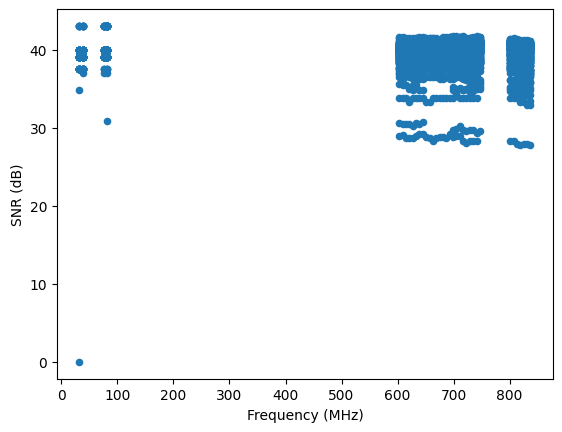

In [469]:
# gráfico de dispersión SNR por frecuencia
df.plot(x='Frequency (MHz)', y='SNR (dB)', kind='scatter')
plt.show()
# acá se puede apreciar la distribución de portadoras en el espectro y su relación Señal-Ruido.

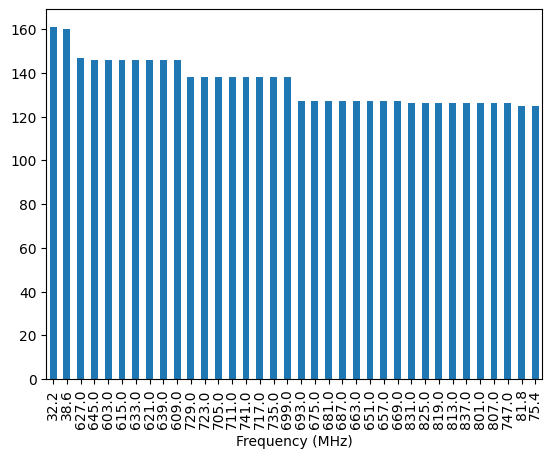

In [182]:
#cantidad de CMs por portadora
df['Frequency (MHz)'].value_counts().plot(kind='bar')
plt.show()
#aqui se puede ver que la parte del espectro más utilizada son las primeras 2 portadoras de modulación QAM-64, 32.2 y 38.6 MHz

In [714]:
#extraer unamuestra del df 10%
from scipy.stats import ks_2samp
muestra_1 = df_DS.sample(frac=0.1, random_state=1)
df_DS.shape

(4868, 15)

In [715]:
# ver el tamaño del df muestra_1 10%
muestra_1.shape

(487, 15)

In [716]:
# crear una variable de columnas numéricas del df
columnas_numericas_datos = df_DS.select_dtypes(include='number').columns
columnas_numericas_datos

Index(['Frequency (MHz)', 'Rx Power (dBmV)', 'MER (dB)', 'SNR (dB)',
       'SNR Deviation (σ)', 'CCER+CER (%)', 'CER (%)',
       'Spectral Response (dB)'],
      dtype='object')

In [718]:
# crear una variable de columnas numéricas del df muestra_1
columnas_numericas_muestra = muestra_1.select_dtypes(include='number').columns
columnas_numericas_muestra

Index(['Frequency (MHz)', 'Rx Power (dBmV)', 'MER (dB)', 'SNR (dB)',
       'SNR Deviation (σ)', 'CCER+CER (%)', 'CER (%)',
       'Spectral Response (dB)'],
      dtype='object')

In [719]:
features = ['Frequency (MHz)', 'Rx Power (dBmV)','CER (%)']#los atributos que uso son los que tienen mayor probabilidad de degradar el servicio al punto que el cliente lo perciba.

In [720]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_processed = scaler.fit_transform(muestra_1[features])

In [721]:
df_processed

array([[ 0.23049399,  0.72701758, -0.06617741],
       [ 0.31221134,  0.68602683, -0.06617741],
       [ 0.88423274,  0.3376055 , -0.06617741],
       ...,
       [ 0.55736336,  1.32138338, -0.06617741],
       [ 0.39392868,  0.37859624, -0.06617741],
       [ 0.06705931, -1.50697803, -0.06617741]])

In [722]:
df_var_continuas.shape

(4868, 10)

In [723]:
df_DS.shape

(4868, 15)

In [724]:
df_DS

,MAC Address,Channel Name,Partial Service,Frequency (MHz),Modulation,Status,Rx Power (dBmV),MER (dB),SNR (dB),SNR Deviation (σ),CCER+CER (%),CER (%),Spectral Response (dB),Latest Proactive Scan,Latest Outage Scan
0,44:D4:54:B7:4D:34,Cable1/0/3-upstream4,none,75.4,QAM-64,Online,7.0,39.586569,43.1,0.9,0.0000,0.0000,29.161973,"10/16/2024, 7:25:13 PM","10/16/2024, 7:25:13 PM"
1,A0:39:EE:99:D9:30,Cable1/0/3-upstream0,none,38.6,QAM-64,Online,8.0,39.586569,43.1,1.7,0.0114,0.0006,29.161973,"10/16/2024, 7:25:13 PM","10/16/2024, 7:25:13 PM"
2,44:D4:54:A0:E1:47,Cable1/0/3-upstream4,none,75.4,QAM-64,Online,7.0,39.586569,43.1,0.7,0.0000,0.0000,29.161973,"10/16/2024, 7:25:13 PM","10/16/2024, 7:25:13 PM"
3,E4:C0:E2:13:05:4E,Cable1/0/3-upstream1,none,32.2,QAM-64,Online,7.0,39.586569,43.1,1.0,0.0000,0.0000,29.161973,"10/16/2024, 7:25:13 PM","10/16/2024, 7:25:13 PM"
4,E4:C0:E2:13:05:4E,Cable1/0/3-upstream5,none,81.8,QAM-64,Online,7.0,39.586569,43.1,1.0,0.0000,0.0000,29.161973,"10/16/2024, 7:25:13 PM","10/16/2024, 7:25:13 PM"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4863,84:17:EF:B5:51:B7,Integrated-Cable1/0/3-downstream27,none,813.0,QAM-256,Online,0.7,27.900000,27.9,0.1,3.1700,0.0001,0.000000,"10/16/2024, 7:25:13 PM","10/16/2024, 7:25:13 PM"
4864,84:17:EF:B5:51:B7,Integrated-Cable1/0/3-downstream30,none,831.0,QAM-256,Online,0.4,27.900000,27.9,0.1,3.6565,0.0003,0.000000,"10/16/2024, 7:25:13 PM","10/16/2024, 7:25:13 PM"
4865,84:17:EF:B5:51:B7,Integrated-Cable1/0/3-downstream28,none,819.0,QAM-256,Online,0.7,27.800000,27.8,0.1,4.9692,0.0007,0.000000,"10/16/2024, 7:25:13 PM","10/16/2024, 7:25:13 PM"
4866,84:17:EF:B5:51:B7,Integrated-Cable1/0/3-downstream31,none,837.0,QAM-256,Online,0.5,27.700000,27.8,0.1,6.1848,0.0015,0.000000,"10/16/2024, 7:25:13 PM","10/16/2024, 7:25:13 PM"


In [725]:
df_US.shape

(571, 18)

In [726]:
df_US

,MAC Address,Channel Name,Partial Service,Frequency (MHz),Modulation,Status,Tx Power (dBmV),Attenuation (dB),SNR (dB),SNR Deviation (σ),CCER+CER (%),CER (%),Composite Equalization [NMTER] (dB),Group Response [PREMTTER] (dB),Echo Response [POSTMTTER] (dB),Deviation of Echo Response (σ),Latest Proactive Scan,Latest Outage Scan
0,44:D4:54:B7:4D:34,Cable1/0/3-upstream4,none,75.4,QAM-64,Online,48.5,41.5,43.1,0.9,0.0000,0.0000,-26.4,-27.7,-32.2,0.000065,"10/16/2024, 7:25:13 PM","10/16/2024, 7:25:13 PM"
1,A0:39:EE:99:D9:30,Cable1/0/3-upstream0,none,38.6,QAM-64,Online,44.5,36.5,43.1,1.7,0.0114,0.0006,-28.7,-29.9,-34.6,0.000099,"10/16/2024, 7:25:13 PM","10/16/2024, 7:25:13 PM"
2,44:D4:54:A0:E1:47,Cable1/0/3-upstream4,none,75.4,QAM-64,Online,41.8,34.8,43.1,0.7,0.0000,0.0000,-25.9,-29.6,-28.4,0.000141,"10/16/2024, 7:25:13 PM","10/16/2024, 7:25:13 PM"
3,E4:C0:E2:13:05:4E,Cable1/0/3-upstream1,none,32.2,QAM-64,Online,48.5,41.5,43.1,1.0,0.0000,0.0000,-29.1,-44.3,-29.3,0.012931,"10/16/2024, 7:25:13 PM","10/16/2024, 7:25:13 PM"
4,E4:C0:E2:13:05:4E,Cable1/0/3-upstream5,none,81.8,QAM-64,Online,50.3,43.3,43.1,1.0,0.0000,0.0000,-17.4,-20.8,-20,0.000808,"10/16/2024, 7:25:13 PM","10/16/2024, 7:25:13 PM"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4636,98:77:E7:0F:6D:11,Cable1/0/3-upstream0,none,38.6,QAM-64,Online,55.5,49.5,37.0,0.9,0.0000,0.0000,-29.1,-42.4,-29.3,0.000125,"10/16/2024, 7:25:13 PM","10/16/2024, 7:25:13 PM"
4637,98:77:E7:0F:6D:11,Cable1/0/3-upstream5,none,81.8,QAM-64,Online,55.5,52.0,37.0,0.6,0.0000,0.0000,-17.3,-23.9,-18.3,0.001169,"10/16/2024, 7:25:13 PM","10/16/2024, 7:25:13 PM"
4765,84:1E:A3:91:13:24,Cable1/0/0-upstream1,none,32.2,QAM-64,Online,45.8,38.8,34.9,1.2,0.0000,0.0000,-26.4,-41,-26.5,0.000255,"10/16/2024, 7:25:13 PM","10/16/2024, 7:25:13 PM"
4818,84:17:EF:31:46:28,Cable1/0/3-upstream5,other(1),81.8,QAM-64,Online,54.0,59.0,30.9,0.3,0.0000,0.0000,-10.8,-24.5,-11,0.010756,"10/16/2024, 7:25:13 PM","10/16/2024, 7:25:13 PM"


In [727]:
#dejar solo variables numerícas en el df_DS
# reducir la dimensionalidad
df_DS.info()
df_DS.describe()
df_DS = df_DS.drop(['MAC Address','Channel Name','Modulation','Status','Latest Proactive Scan','Latest Outage Scan'], axis=1)
df_DS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4868 entries, 0 to 4867
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   MAC Address             4868 non-null   object 
 1   Channel Name            4868 non-null   object 
 2   Partial Service         4868 non-null   object 
 3   Frequency (MHz)         4868 non-null   float64
 4   Modulation              4868 non-null   object 
 5   Status                  4868 non-null   object 
 6   Rx Power (dBmV)         4868 non-null   float64
 7   MER (dB)                4868 non-null   float64
 8   SNR (dB)                4868 non-null   float64
 9   SNR Deviation (σ)       4868 non-null   float64
 10  CCER+CER (%)            4868 non-null   float64
 11  CER (%)                 4868 non-null   float64
 12  Spectral Response (dB)  4868 non-null   float64
 13  Latest Proactive Scan   4868 non-null   object 
 14  Latest Outage Scan      4868 non-null   

In [728]:
df_DS

,Partial Service,Frequency (MHz),Rx Power (dBmV),MER (dB),SNR (dB),SNR Deviation (σ),CCER+CER (%),CER (%),Spectral Response (dB)
0,none,75.4,7.0,39.586569,43.1,0.9,0.0000,0.0000,29.161973
1,none,38.6,8.0,39.586569,43.1,1.7,0.0114,0.0006,29.161973
2,none,75.4,7.0,39.586569,43.1,0.7,0.0000,0.0000,29.161973
3,none,32.2,7.0,39.586569,43.1,1.0,0.0000,0.0000,29.161973
4,none,81.8,7.0,39.586569,43.1,1.0,0.0000,0.0000,29.161973
...,...,...,...,...,...,...,...,...,...
4863,none,813.0,0.7,27.900000,27.9,0.1,3.1700,0.0001,0.000000
4864,none,831.0,0.4,27.900000,27.9,0.1,3.6565,0.0003,0.000000
4865,none,819.0,0.7,27.800000,27.8,0.1,4.9692,0.0007,0.000000
4866,none,837.0,0.5,27.700000,27.8,0.1,6.1848,0.0015,0.000000


In [729]:
# reducir la dimensionalidad
# dejar solo variables numericas en el df_US
# antes
df_US.info()
df_US.describe()
df_US = df_US.drop(['MAC Address','Channel Name','Modulation','Status','Modulation','Status','Composite Equalization [NMTER] (dB)','Group Response [PREMTTER] (dB)','Echo Response [POSTMTTER] (dB)','Latest Proactive Scan','Latest Outage Scan'], axis=1)
# despues
df_US.info()
df_US.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 571 entries, 0 to 4867
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   MAC Address                          571 non-null    object 
 1   Channel Name                         571 non-null    object 
 2   Partial Service                      571 non-null    object 
 3   Frequency (MHz)                      571 non-null    float64
 4   Modulation                           571 non-null    object 
 5   Status                               571 non-null    object 
 6   Tx Power (dBmV)                      571 non-null    float64
 7   Attenuation (dB)                     571 non-null    float64
 8   SNR (dB)                             571 non-null    float64
 9   SNR Deviation (σ)                    571 non-null    float64
 10  CCER+CER (%)                         571 non-null    float64
 11  CER (%)                             

,Frequency (MHz),Tx Power (dBmV),Attenuation (dB),SNR (dB),SNR Deviation (σ),CCER+CER (%),CER (%),Deviation of Echo Response (σ)
count,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000
mean,54.308581,47.792820,40.803327,39.776532,0.682487,0.009995,0.000304,0.000757
std,21.693837,3.817196,3.962186,2.075110,0.308377,0.055481,0.004768,0.003361
min,32.200000,36.300000,29.300000,0.000000,0.000000,0.000000,0.000000,0.000041
25%,32.200000,45.000000,38.000000,39.100000,0.500000,0.000000,0.000000,0.000123
50%,38.600000,47.800000,40.800000,40.000000,0.600000,0.000000,0.000000,0.000215
75%,75.400000,50.500000,43.500000,40.000000,0.800000,0.000000,0.000000,0.000367
max,81.800000,56.700000,59.000000,43.100000,3.200000,0.833300,0.112200,0.055377


In [730]:
# separar en X ( datos conocidos ) e y( a predecir )
X = df_DS.drop('Partial Service',axis=1).copy()
y = df_DS['Partial Service'].copy()

In [485]:
X

,Frequency (MHz),Rx Power (dBmV),MER (dB),SNR (dB),SNR Deviation (σ),CCER+CER (%),CER (%),Spectral Response (dB)
0,75.4,7.0,39.586569,43.1,0.9,0.0000,0.0000,29.161973
1,38.6,8.0,39.586569,43.1,1.7,0.0114,0.0006,29.161973
2,75.4,7.0,39.586569,43.1,0.7,0.0000,0.0000,29.161973
3,32.2,7.0,39.586569,43.1,1.0,0.0000,0.0000,29.161973
4,81.8,7.0,39.586569,43.1,1.0,0.0000,0.0000,29.161973
...,...,...,...,...,...,...,...,...
4863,813.0,0.7,27.900000,27.9,0.1,3.1700,0.0001,0.000000
4864,831.0,0.4,27.900000,27.9,0.1,3.6565,0.0003,0.000000
4865,819.0,0.7,27.800000,27.8,0.1,4.9692,0.0007,0.000000
4866,837.0,0.5,27.700000,27.8,0.1,6.1848,0.0015,0.000000


In [731]:
y

,Partial Service
0,none
1,none
2,none
3,none
4,none
...,...
4863,none
4864,none
4865,none
4866,none


In [732]:
# muestra las variables de Y
y.unique()

array(['none', 'other(1)'], dtype=object)

In [733]:
# cambiar other(1) por 1 , cambiar none por 0
y = y.replace('none', 0)
y = y.replace('other(1)', 1)

<ipython-input-733-3c8465b83911>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = y.replace('other(1)', 1)


In [734]:
y.unique()

array([0, 1])

In [735]:
# que porsentaje hay de cada clase
y.value_counts(normalize=True)*100

,proportion
Partial Service,
0,99.958915
1,0.041085


In [736]:
from sklearn.model_selection import train_test_split

In [737]:
#separa el df en 4 sub conjuntos, 2 de prueva (X+y)p y 2 de test (X+y)t, test es un 30% del original, con una ''semilla'',
#que garantiza la aleatoriedad de los datos en cada conjunto.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [738]:
X_train.shape

(3407, 8)

In [739]:
X_test.shape

(1461, 8)

In [740]:
y_train.shape

(3407,)

In [741]:
y_test.shape

(1461,)

In [742]:
from sklearn.preprocessing import LabelEncoder

# Crea una instancia de LabelEncoder para cada columna
le_snr_train = LabelEncoder()
le_cer_train = LabelEncoder()

# Ajusta y transforma cada columna por separado
X_train['SNR (dB)_encoded'] = le_snr_train.fit_transform(X_train['SNR (dB)'])
X_train['CER (%)_encoded'] = le_cer_train.fit_transform(X_train['CER (%)'])

# Elimina las columnas originales si es necesario
X_train = X_train.drop(['SNR (dB)', 'CER (%)'], axis=1)

le_snr_test = LabelEncoder()
le_cer_test = LabelEncoder()

# Repite el mismo proceso para X_test
X_test['SNR (dB)_encoded'] = le_snr_test.fit_transform(X_test['SNR (dB)'])
X_test['CER (%)_encoded'] = le_cer_test.fit_transform(X_test['CER (%)'])
X_test = X_test.drop(['SNR (dB)', 'CER (%)'], axis=1)



In [743]:
# Obtener los nombres de las características utilizadas durante el entrenamiento
training_features = X_train.columns.tolist()
# Asegurarse de que X_test tenga las mismas características en el mismo orden
X_train = X_train[training_features]
X_test = X_test[training_features]

In [744]:
X_train

,Frequency (MHz),Rx Power (dBmV),MER (dB),SNR Deviation (σ),CCER+CER (%),Spectral Response (dB),SNR (dB)_encoded,CER (%)_encoded
682,681.0,2.4,40.8,0.0,0.0,34.0,90,0
4436,621.0,-0.7,37.8,0.2,0.0,18.0,60,0
1278,669.0,-0.2,40.5,0.1,0.0,34.0,87,0
1577,609.0,6.9,40.2,0.1,0.0,30.0,85,0
3286,627.0,-2.2,39.5,0.1,0.0,31.0,77,0
...,...,...,...,...,...,...,...,...
4098,723.0,0.5,38.6,0.2,0.0,37.0,68,0
2778,603.0,-3.9,40.0,0.2,0.0,30.0,81,0
3164,663.0,-2.3,39.6,0.1,0.0,30.0,78,0
3134,675.0,3.3,39.8,0.2,0.0,33.0,79,0


In [745]:
# concatenar
X_train = pd.concat([X_train, encoded_df], axis= 'columns')

In [746]:
X_train

,Frequency (MHz),Rx Power (dBmV),MER (dB),SNR Deviation (σ),CCER+CER (%),Spectral Response (dB),SNR (dB)_encoded,CER (%)_encoded,SNR (dB)_0.0,SNR (dB)_27.8,SNR (dB)_27.9,SNR (dB)_28.0,SNR (dB)_28.3,SNR (dB)_28.4,SNR (dB)_28.7,SNR (dB)_28.9,SNR (dB)_29.0,SNR (dB)_29.1,SNR (dB)_29.3,SNR (dB)_29.4,SNR (dB)_29.6,SNR (dB)_29.7,SNR (dB)_29.8,SNR (dB)_29.9,SNR (dB)_30.2,SNR (dB)_30.5,SNR (dB)_30.6,SNR (dB)_30.8,SNR (dB)_33.0,SNR (dB)_33.4,SNR (dB)_33.5,SNR (dB)_33.8,SNR (dB)_33.9,SNR (dB)_34.1,SNR (dB)_34.2,SNR (dB)_34.3,SNR (dB)_34.4,SNR (dB)_34.5,SNR (dB)_34.6,SNR (dB)_34.7,SNR (dB)_34.8,SNR (dB)_34.9,SNR (dB)_35.0,SNR (dB)_35.1,SNR (dB)_35.2,SNR (dB)_35.3,SNR (dB)_35.5,SNR (dB)_35.6,SNR (dB)_35.7,SNR (dB)_35.8,...,SNR (dB)_41.0,SNR (dB)_41.1,SNR (dB)_41.2,SNR (dB)_41.3,SNR (dB)_41.4,SNR (dB)_41.5,SNR (dB)_41.6,SNR (dB)_41.7,SNR (dB)_41.8,SNR (dB)_43.1,CER (%)_0.0,CER (%)_0.0001,CER (%)_0.0002,CER (%)_0.0003,CER (%)_0.0004,CER (%)_0.0006,CER (%)_0.0007,CER (%)_0.0008,CER (%)_0.0013,CER (%)_0.0015,CER (%)_0.0016,CER (%)_0.0018,CER (%)_0.0026,CER (%)_0.0028,CER (%)_0.0038,CER (%)_0.0042,CER (%)_0.0049,CER (%)_0.0056,CER (%)_0.0059,CER (%)_0.0065,CER (%)_0.0067,CER (%)_0.0073,CER (%)_0.0083,CER (%)_0.0092,CER (%)_0.0096,CER (%)_0.014,CER (%)_0.0143,CER (%)_0.0145,CER (%)_0.0148,CER (%)_0.0149,CER (%)_0.0159,CER (%)_0.0202,CER (%)_0.0457,CER (%)_0.0656,CER (%)_0.071,CER (%)_0.0841,CER (%)_0.0919,CER (%)_0.1116,CER (%)_0.1216,CER (%)_0.2483
682,681.0,2.4,40.8,0.0,0.0,34.0,90,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4436,621.0,-0.7,37.8,0.2,0.0,18.0,60,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1278,669.0,-0.2,40.5,0.1,0.0,34.0,87,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1577,609.0,6.9,40.2,0.1,0.0,30.0,85,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3286,627.0,-2.2,39.5,0.1,0.0,31.0,77,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4098,723.0,0.5,38.6,0.2,0.0,37.0,68,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [747]:
# concatenar X_test
X_test = pd.concat([X_test, encoded_df_test], axis= 'columns')
X_test

,Frequency (MHz),Rx Power (dBmV),MER (dB),SNR Deviation (σ),CCER+CER (%),Spectral Response (dB),SNR (dB)_encoded,CER (%)_encoded,SNR (dB)_0.0,SNR (dB)_27.8,SNR (dB)_27.9,SNR (dB)_28.0,SNR (dB)_28.3,SNR (dB)_28.4,SNR (dB)_28.7,SNR (dB)_28.9,SNR (dB)_29.0,SNR (dB)_29.1,SNR (dB)_29.3,SNR (dB)_29.4,SNR (dB)_29.6,SNR (dB)_29.7,SNR (dB)_29.8,SNR (dB)_29.9,SNR (dB)_30.2,SNR (dB)_30.5,SNR (dB)_30.6,SNR (dB)_30.8,SNR (dB)_30.9,SNR (dB)_33.0,SNR (dB)_33.4,SNR (dB)_33.5,SNR (dB)_33.8,SNR (dB)_33.9,SNR (dB)_34.1,SNR (dB)_34.2,SNR (dB)_34.3,SNR (dB)_34.4,SNR (dB)_34.5,SNR (dB)_34.6,SNR (dB)_34.7,SNR (dB)_34.8,SNR (dB)_34.9,SNR (dB)_35.0,SNR (dB)_35.1,SNR (dB)_35.2,SNR (dB)_35.3,SNR (dB)_35.5,SNR (dB)_35.6,SNR (dB)_35.7,...,SNR (dB)_41.3,SNR (dB)_41.4,SNR (dB)_41.5,SNR (dB)_41.6,SNR (dB)_41.7,SNR (dB)_41.8,SNR (dB)_43.1,CER (%)_0.0,CER (%)_0.0001,CER (%)_0.0002,CER (%)_0.0003,CER (%)_0.0004,CER (%)_0.0006,CER (%)_0.0007,CER (%)_0.0008,CER (%)_0.0013,CER (%)_0.0015,CER (%)_0.0016,CER (%)_0.0018,CER (%)_0.0019,CER (%)_0.0026,CER (%)_0.0028,CER (%)_0.0038,CER (%)_0.0042,CER (%)_0.0049,CER (%)_0.0056,CER (%)_0.0059,CER (%)_0.0065,CER (%)_0.0067,CER (%)_0.0073,CER (%)_0.0083,CER (%)_0.0092,CER (%)_0.0096,CER (%)_0.014,CER (%)_0.0143,CER (%)_0.0145,CER (%)_0.0148,CER (%)_0.0149,CER (%)_0.0159,CER (%)_0.0202,CER (%)_0.0457,CER (%)_0.0498,CER (%)_0.0627,CER (%)_0.0656,CER (%)_0.071,CER (%)_0.0841,CER (%)_0.0919,CER (%)_0.1116,CER (%)_0.1216,CER (%)_0.2483
3597,75.4,7.5,39.586569,1.3,0.0000,29.161973,54,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3343,705.0,-3.4,39.500000,0.1,0.0001,38.000000,58,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
728,723.0,4.2,40.800000,0.1,0.0000,33.000000,71,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1046,735.0,0.8,40.600000,0.0,0.0000,28.000000,69,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1817,657.0,9.7,40.200000,0.1,0.0000,31.000000,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3302,819.0,-1.5,39.5

In [748]:
X_test = X_test.drop(['CER (%)_0.0019', 'CER (%)_0.0498', 'CER (%)_0.0627', 'SNR (dB)_30.9', 'SNR (dB)_36.0'], axis=1)

In [749]:
X_train.info()
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3407 entries, 682 to 1224
Columns: 150 entries, Frequency (MHz) to CER (%)_0.2483
dtypes: float64(148), int64(2)
memory usage: 3.9 MB
<class 'pandas.core.frame.DataFrame'>
Index: 1461 entries, 3597 to 1218
Columns: 150 entries, Frequency (MHz) to CER (%)_0.2483
dtypes: float64(148), int64(2)
memory usage: 1.7 MB


In [750]:

# cambiar NaN por 0 en la columna Partial Service
y_train = y_train.fillna(0)
y_test = y_test.fillna(0)

In [751]:
y_train.unique()

array([0, 1])

In [752]:
y_test.unique()

array([0, 1])

In [753]:
# entrenar un modelo con arbol de decición
from sklearn.tree import DecisionTreeClassifier

In [754]:
# instanciar el modelo de arbol de decición
arbol= DecisionTreeClassifier(max_depth=5, random_state=42).fit(X_train, y_train)

In [755]:
arbol

DecisionTreeClassifier(max_depth=5, random_state=42)

In [756]:
# Obtener los nombres de las características utilizadas durante el entrenamiento
training_features = X_train.columns.tolist()
# Asegurarse de que X_test tenga las mismas características en el mismo orden
X_train = X_train[training_features]
X_test = X_test[training_features]


In [757]:
# Asegurarse de que X_test tenga las mismas características en el mismo orden
X_train = X_train[training_features]
X_test = X_test[training_features]



In [758]:
# predecir valores de y
train_pred = arbol.predict(X_train)

In [759]:
test_pred = arbol.predict(X_test)

In [763]:
 from sklearn.metrics import classification_report
 print(classification_report(y_train, train_pred))
 print("--------------------------------------------------------")
 print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3406
           1       1.00      1.00      1.00         1

    accuracy                           1.00      3407
   macro avg       1.00      1.00      1.00      3407
weighted avg       1.00      1.00      1.00      3407

--------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1460
           1       0.00      0.00      0.00         1

    accuracy                           1.00      1461
   macro avg       0.50      0.50      0.50      1461
weighted avg       1.00      1.00      1.00      1461



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# analizando los datos de las predicciones, queda claro que las variables que elegí para predecir no fueron las mejores, ya que de todos los registros de los cablemodems solo 1 estaba en Partial Service.
#a nivel de negocio nos serviría para enviar un técnico de forma proactiva a realizar un service sabiendo que el cliente está con degradación del servicio.